In [22]:
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

## Load the summary output

In [30]:
path = '/media/cudmore/data/Dropbox/data/declan/data20230916/Baseline_Bloodflow_Master_Rosetta.csv'
df = pd.read_csv(path)

# add coefficient of variation column
df['cvVel'] = df['stdVel'] / df['meanVel']

## Make a table of values for male and female

We have a lot of experimental "blocks" including Genotype, Age, and Sex. There are other like branch order.

In [48]:
# get stats broken down by Genotype, Age, and Sex
colList = ['Genotype', 'Age', 'Sex']
aggList = ["count", "mean", "std", "sem", "median"]
df.groupby(colList)['meanVel'].agg(aggList)

count      mean       std       sem    median
Genotype   Age   Sex                                                  
Kv2.1-SMKO young female     11  1.202553  0.563467  0.169892  1.054575
                 male       17  1.096939  0.604387  0.146585  0.930362
Kv2.1-TKO  young male       11  1.016648  0.589593  0.177769  0.992503
wt         old   female      7  1.427010  0.455642  0.172216  1.480199
           young female     91  1.321435  0.513278  0.053806  1.248486
                 male       87  1.097362  0.683594  0.073289  0.935163

In [45]:
# reduce dataframe to just Genotype 'wt'
dfWildType = df[df['Genotype'] == 'wt']

aggList = ["count", "mean", "std", "sem", "median", "min", "max"]
groupByColumnName = 'Sex'

statName = 'meanVel'
dfStat = dfWildType.groupby(groupByColumnName, as_index=False)[statName].agg(aggList)
print('group meanVel by sex')
display(dfStat)

statName = 'cvVel'
dfStat = dfWildType.groupby(groupByColumnName, as_index=False)[statName].agg(aggList)
print('group cvVel by sex')
display(dfStat)


group meanVel by sex


,count,mean,std,sem,median,min,max
Sex,,,,,,,
female,98,1.328976,0.507967,0.051312,1.261423,0.430674,2.696625
male,87,1.097362,0.683594,0.073289,0.935163,0.118428,3.608026


group cvVel by sex


,count,mean,std,sem,median,min,max
Sex,,,,,,,
female,98,0.147115,0.108965,0.011007,0.125798,0.043024,0.843469
male,87,0.195364,0.088868,0.009528,0.172771,0.045699,0.458681


## Run some stats

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [40]:
# split into male/female polulations based on 'Sex' column
dfMale = dfWildType[dfWildType['Sex']=='male']
dfFemale = dfWildType[dfWildType['Sex']=='female']

statName = 'meanVel'
pop1 = dfMale[statName].to_numpy()
pop2 = dfFemale[statName].to_numpy()
kruskal1 = scipy.stats.kruskal(pop1, pop2, nan_policy='omit')
print('meanVel:', kruskal1)

statName = 'cvVel'
pop1 = dfMale[statName].to_numpy()
pop2 = dfFemale[statName].to_numpy()
kruskal2 = scipy.stats.kruskal(pop1, pop2, nan_policy='omit')
print('cvVel:', kruskal2)



meanVel: KruskalResult(statistic=10.878307719083296, pvalue=0.0009729710659360898)
cvVel: KruskalResult(statistic=29.158392166655403, pvalue=6.669622234486506e-08)


This tells us there is a significant different between wildtype male and female mean velocity as well as the CV of velocity!.

## Make some plots

We will start by plotting cumulative histograms for both mean velocity and cv of velocity.

We will do this for wildtype male versus female.

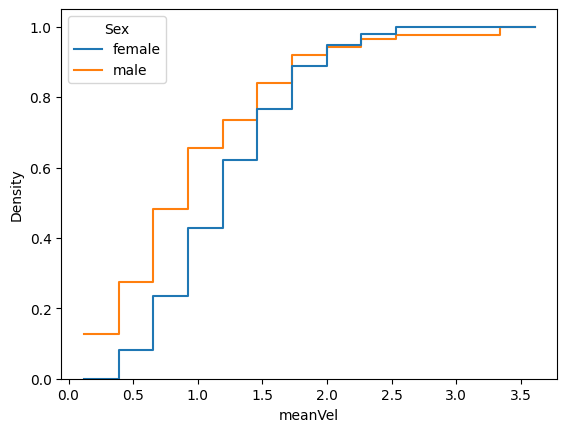

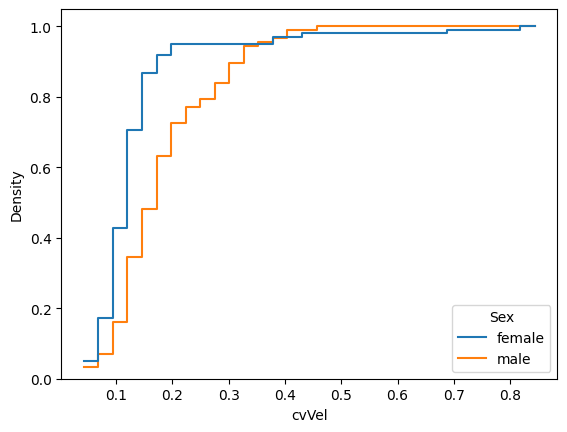

In [49]:

hue = 'Sex'

xStat = 'meanVel'
g1 = sns.histplot(
    x=xStat, hue=hue,
    cumulative=True, stat="density", element="step", fill=False, common_norm=False,
    data=dfWildType)
plt.show()

xStat = 'cvVel'
g2 = sns.histplot(
    x=xStat, hue=hue,
    cumulative=True, stat="density", element="step", fill=False, common_norm=False,
    data=dfWildType)


## Look at male mice across the three genotypes

For now, exclude genotype 'Kv2.1-TKO'

In [79]:
# grab just the male mice from original
sex = 'male'
sex = 'female'
df2 = df[df['Sex']==sex]

# statName = 'meanVel'
statName = 'cvVel'
popList = []
genotypes = df2['Genotype'].unique()
for genotype in genotypes:
    if genotype == 'Kv2.1-TKO':
        continue
    aPop = df2[df2['Genotype']==genotype]
    aPopValues = aPop[statName].to_numpy()
    print(statName, sex, 'genotype', genotype, 'has n =', len(aPopValues))
    popList.append(aPopValues)

kruskal1 = scipy.stats.kruskal(*popList, nan_policy='omit')
print(statName, kruskal1)

cvVel female genotype wt has n = 98
cvVel female genotype Kv2.1-SMKO has n = 11
cvVel KruskalResult(statistic=15.949637375611417, pvalue=6.505023916758482e-05)


An intermediate conclusion here is:
 - meanVel is not significant for this grouping
 - cvVel is significant between genotypes for female but not male?

## Make some box plots grouping by sex and genotype


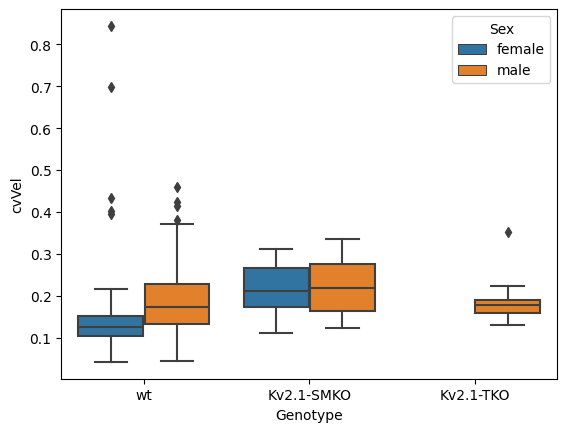

In [80]:
hue = 'Sex'
data = df
g = sns.boxplot(x='Genotype', y=statName, hue=hue, data=data)